- 데이터 포인트, 샘플, 입력 - 맥락에 따라 상호 교환 사용 가능
- 다중 레이블 분류 - 각 입력 샘플이 여러 개의 레이블에 할당될 수 있는 분류 작업
- 스칼라 회귀 - 각기 다른 타깃 가격이 연속적인 공간을 형성함(주택 가격 예측)
- 벡터 회귀
- 미니 배치 또는 배치 - 모델에 의해 동시에 처리되는 소량의 샘플 묶음(일반적으로 8개에서 128개 사이), 샘플 개수는 GPU의 메모리 할당이 용이하도록 2의 거듭제곱으로 하는 경우가 많음, 훈련할 때 미니 배치마다 한 번씩 모델의 가중치에 적용할 경사 하강법 업데이트 값을 계산함

# TensorFlow 2.0부터는 Keras가 TensorFlow의 공식 API로 통합. - TensorFlow를 사용하여 Keras 모델을 구성하는 방법

### Sequential 모델
Sequential 모델은 Keras에서 제공하는 가장 간단한 모델 구성 방법. Sequential 모델은 레이어를 순차적으로 쌓아 나가는 방식으로 모델을 구성. 각 레이어는 이전 레이어의 출력을 입력으로 받는다.하나의 입력과 하나의 출력을 가지는 단일 흐름의 모델을 만들기에 적합
- TensorFlow와 Keras 가져오기:
- Sequential 모델 생성:
Sequential 모델은 레이어를 선형으로 쌓아서 만드는 가장 간단한 모델입니다.
- 레이어 추가:
모델에 레이어를 추가하여 모델의 구조를 정의합니다. Keras에서는 다양한 유형의 레이어를 제공합니다. 예를 들어, Dense(완전 연결 레이어), Conv2D(2D 컨볼루션 레이어), LSTM(장기 단기 메모리 레이어) 등이 있습니다.
- 모델 컴파일:
모델의 구조를 정의한 후에는 컴파일 단계에서 손실 함수, 최적화 알고리즘 및 성능 지표를 지정해야 합니다.
- 모델 요약 정보 출력:
- 모델 학습:
- 모델 예측:
- 모델 저장 및 로드:

In [ ]:
# activation - 다중분류는 softmax, 이진분류는 시그모이드 사용

# Sequential 방식
import tensorflow as tf
from tensorflow import keras

model = keras.models.Sequential()

model.add(keras.layers.Dense(units=64, activation='relu', input_shape=(input_dim,)))
model.add(keras.layers.Dense(units=32, activation='relu'))
model.add(keras.layers.Dense(units=10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

model.fit(x_train, y_train, batch_size=32, epochs=10, validation_data=(x_val, y_val))

predictions = model.predict(x_test)

model.save('my_model.h5')  # 모델 저장
loaded_model = keras.models.load_model('my_model.h5')  # 모델 로드

### Functional API

Functional API는 복잡한 모델 구조를 지원하며, 다양한 연결 및 분기 구조를 갖는 네트워크를 생성하는 데 유용

- TensorFlow와 필요한 모듈 가져오기:
- 입력 레이어 정의:
모델의 입력 레이어를 정의합니다.
- 레이어 구성:
다양한 레이어를 사용하여 모델의 구조를 정의합니다. 각 레이어는 이전 레이어의 출력을 입력으로 받습니다.
- 모델 생성:
입력과 출력을 지정하여 모델을 생성합니다.
- 모델 컴파일:
모델의 구조를 정의한 후에는 컴파일 단계에서 손실 함수, 최적화 알고리즘 및 성능 지표를 지정해야 합니다.
- 모델 요약 정보 출력:
- 모델 학습:
훈련 데이터를 사용하여 모델을 학습시킵니다. 입력 데이터와 해당 출력 데이터를 제공해야 합니다.
- 모델 예측:
- 모델 저장 및 로드:

In [ ]:
# 함수 방식
import tensorflow as tf
from tensorflow import keras

inputs = keras.Input(shape=(input_dim,))

x = keras.layers.Dense(units=64, activation='relu')(inputs)
x = keras.layers.Dense(units=32, activation='relu')(x)
outputs = keras.layers.Dense(units=10, activation='softmax')(x)

model = keras.Model(inputs=inputs, outputs=outputs)

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

model.fit(x_train, y_train, batch_size=32, epochs=10, validation_data=(x_val, y_val))

predictions = model.predict(x_test)

model.save('my_model.h5')  # 모델 저장
loaded_model = keras.models.load_model('my_model.h5')  # 모델 로드

# 4.1 영화 비류 분류: 이진 분류 문제

## 4.1.1 IMDB 데이터셋

In [1]:
# 각 리뷰는 단어의 시퀀스로 표현되며, 각 단어는 정수 인덱스로 매핑됨
# num_words는 단어 인덱스의 범위를 정의하는 매개 변수임 (가장 빈도가 높은 상위 n개의 단어 만을 사용하도록 데이터를 제한하는데 사용)
# 나머지 단어는 unknown 또는 out of vocabulary를 의미하는 특별한 인덱스로 표시됨
# sequence - 순서대로 나열된 데이터 요소들의 집합 (리스트, 튜플, 문자열 등)
# IMDB 데이터셋의 미리 정의된 단어 집합(vocabulary)에 따라 인덱스가 맵핑됨

from tensorflow.keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)    # 훈련 데이터에서 가장 자주 나타나는 단어 1만 개만 사용하겠다는 의미

print(train_data[0])
train_labels[0]    # 부정이 0, 긍정이 1

17464789/17464789 [==============================] - 0s 0us/step
[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178,

1

In [ ]:
train_data

array([list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]),
       list([1, 194, 1153, 194, 8255, 78, 228,

In [34]:
print(len(train_labels))
print(type(train_labels))
print(train_labels)

25000
<class 'numpy.ndarray'>
[1 0 0 ... 0 1 0]


numpy.int64

In [ ]:
print(len(train_data))
print(len(test_data))
print(type(test_data))
print(type(test_data[0]))
print(train_data[0])
print(len(train_data[0]))    # 샘플마다 개수 다르다. 여기서는 단어 9,999개 중 218개를 썼다. 218개의 단어로 구성된 리뷰임

25000
25000
<class 'numpy.ndarray'>
<class 'list'>
[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
218


In [ ]:
# 이건 num_words=50으로 설정한 경우인데, 50 안에 있는 단어들은 해당 인덱스 번호를, 벗어나는 단어는 인덱스 번호를 2로 표시한다
# 0은 패딩, 1은 예약토큰인데, 1로 시작하는 것을 볼 수 있음
# 패딩은 시퀀스의 길이를 맞추기 위해 (0번)
# 예약토큰은 특정 목적을 위해 예약된 특수한 토큰임, 일반적으로 시작 토큰을 나타냄(모델에게 시퀀스 시작을 알림)
# 그래서 단어 인덱스는 3번부터 시작됨
# 위의 내용들 검증해 보아야 함!!!!!!


print(train_data[0], '\n')
max([max(sequence) for sequence in train_data])    # 모든 시퀀스 중에서 가장 큰 값을 반환함(행), 단어 인덱스가 9,999개임(여기서는 50개 설정한 값임)

25000 

218 

[1, 14, 22, 16, 43, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 2, 36, 2, 5, 25, 2, 43, 2, 2, 2, 2, 2, 9, 35, 2, 2, 5, 2, 4, 2, 2, 2, 2, 2, 2, 39, 4, 2, 2, 2, 17, 2, 38, 13, 2, 4, 2, 2, 16, 6, 2, 2, 19, 14, 22, 4, 2, 2, 2, 4, 22, 2, 2, 12, 16, 43, 2, 38, 2, 15, 13, 2, 4, 22, 17, 2, 17, 12, 16, 2, 18, 2, 5, 2, 2, 12, 8, 2, 8, 2, 5, 4, 2, 2, 16, 2, 2, 2, 33, 4, 2, 12, 16, 38, 2, 5, 25, 2, 2, 36, 2, 48, 25, 2, 33, 6, 22, 12, 2, 28, 2, 2, 5, 14, 2, 16, 2, 2, 8, 4, 2, 2, 2, 15, 2, 4, 2, 7, 2, 5, 2, 36, 2, 43, 2, 2, 26, 2, 2, 46, 7, 4, 2, 2, 13, 2, 2, 4, 2, 15, 2, 2, 32, 2, 2, 26, 2, 6, 2, 2, 18, 4, 2, 22, 21, 2, 2, 26, 2, 5, 2, 30, 2, 18, 2, 36, 28, 2, 2, 25, 2, 4, 2, 2, 16, 38, 2, 2, 12, 16, 2, 5, 16, 2, 2, 2, 32, 15, 16, 2, 19, 2, 32] 



49

In [ ]:
# num_words가 10,000이기에 index는 최대가 9,999개임, 그래서 9,999개가 포함된 리뷰 인덱스를 찾아보니 769번임
target_review_index = None
target_word_index = 9999

for i, sequence in enumerate(train_data):
    if target_word_index in sequence:
        target_review_index = i
        break

if target_review_index is not None:
    print("Target review found at index:", target_review_index)
    print("Review content:", train_data[target_review_index])
else:
    print("Target review not found.")


Target review found at index: 769
Review content: [1, 254, 8, 838, 14, 22, 9, 448, 23, 6, 283, 65, 5, 89, 4972, 1319, 8, 5283, 4, 4631, 9, 38, 483, 8412, 2274, 251, 2075, 9, 6, 2, 66, 254, 8, 838, 89, 76, 781, 29, 69, 224, 8, 987, 14, 6356, 109, 149, 90, 23, 268, 9, 6, 1621, 5, 2877, 585, 10, 10, 4, 20, 9, 24, 38, 2, 17, 13, 197, 159, 4, 65, 9, 1932, 1927, 5, 1774, 4972, 9, 24, 2, 34, 4, 2, 27, 113, 9, 82, 3221, 5, 1917, 261, 75, 70, 30, 1887, 7, 4, 5293, 5, 4, 1350, 2, 143, 27, 523, 10, 10, 31, 674, 2367, 7, 2, 1023, 9, 27, 3992, 1425, 63, 186, 8, 30, 53, 1301, 5, 4, 1859, 524, 4905, 2, 82, 1015, 41, 735, 1344, 18, 14, 217, 14, 1922, 117, 655, 2212, 255, 1077, 41, 32, 8, 97, 2, 925, 216, 283, 38, 2042, 18, 4972, 5, 3934, 2, 9, 82, 321, 17, 185, 4972, 51, 6, 239, 18, 6, 506, 4, 119, 65, 7, 4972, 9, 55, 73, 224, 2, 4972, 494, 119, 5, 164, 70, 2, 90, 7, 4, 208, 8, 119, 27, 4266, 23, 4, 307, 884, 2, 3636, 1238, 256, 34, 2, 5047, 13, 244, 1685, 1555, 19, 41, 217, 11, 1335, 6507, 201, 4, 2,

In [ ]:
print(train_data[769])

[1, 254, 8, 838, 14, 22, 9, 448, 23, 6, 283, 65, 5, 89, 4972, 1319, 8, 5283, 4, 4631, 9, 38, 483, 8412, 2274, 251, 2075, 9, 6, 2, 66, 254, 8, 838, 89, 76, 781, 29, 69, 224, 8, 987, 14, 6356, 109, 149, 90, 23, 268, 9, 6, 1621, 5, 2877, 585, 10, 10, 4, 20, 9, 24, 38, 2, 17, 13, 197, 159, 4, 65, 9, 1932, 1927, 5, 1774, 4972, 9, 24, 2, 34, 4, 2, 27, 113, 9, 82, 3221, 5, 1917, 261, 75, 70, 30, 1887, 7, 4, 5293, 5, 4, 1350, 2, 143, 27, 523, 10, 10, 31, 674, 2367, 7, 2, 1023, 9, 27, 3992, 1425, 63, 186, 8, 30, 53, 1301, 5, 4, 1859, 524, 4905, 2, 82, 1015, 41, 735, 1344, 18, 14, 217, 14, 1922, 117, 655, 2212, 255, 1077, 41, 32, 8, 97, 2, 925, 216, 283, 38, 2042, 18, 4972, 5, 3934, 2, 9, 82, 321, 17, 185, 4972, 51, 6, 239, 18, 6, 506, 4, 119, 65, 7, 4972, 9, 55, 73, 224, 2, 4972, 494, 119, 5, 164, 70, 2, 90, 7, 4, 208, 8, 119, 27, 4266, 23, 4, 307, 884, 2, 3636, 1238, 256, 34, 2, 5047, 13, 244, 1685, 1555, 19, 41, 217, 11, 1335, 6507, 201, 4, 2, 2965, 2, 38, 41, 1267, 11, 14, 217, 9, 66, 724, 6

In [ ]:
# 리뷰를 다시 텍스트로 디코딩하기
# imdb.get_word_index() - 매핑 정보를 얻을 수 있음

word_index = imdb.get_word_index()    # word_index는 단어와 정수 인덱스를 매핑한 딕셔너리임

# 단어와 인덱스를 뒤집어서 인덱스와 단어 간의 매핑 정보 생성 (정수 인덱스와 단어를 매핑하도록 뒤집음)
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])

# 첫 번째 훈련 리뷰의 단어 순서와 매핑된 단어 확인
decode_review = " ".join(
    [reverse_word_index.get(i - 3, '?') for i in train_data[0]])    # 리뷰를 디코딩함, 0, 1, 2는 패딩, 문서 시작, 사전에 없음을 위해 예약되어 있으므로,
                                                                    # 인덱스에서 3을 뺌
                                                                    # 인덱스에서 -3을 빼서 음수?가 나오면 찾을 수 없으니까 ?표시함

decode_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

In [ ]:
# IMDB데이터셋에서 사용되는 정수 인덱스는 실제 단어의 인덱스와 일치하지 않음, 기본적으로 IMDB 데이터셋에서는 정수 0,1,2,3은 특별 토큰으로 예약되어 있음,
# 따라서 단어 인덱스는 실제 인덱스보다 3만큼 큰 값을 가짐 (그래서 14를 -3해서 11로 검색해야 함, 그러면 this가 일치함)

word = [word for word, index in word_index.items() if index == 11]
word

['this']

## 4.1.2 데이터 준비
- 신경망에 숫자 리스트를 바로 주입할 수는 없음, 이 숫자 리스트는 모두 길이가 다르지만 신경망은 동일한 크기의 배치를 기대하기 때문임
- 현재 데이터가 리스트 형태인데, 리스트를 텐서로 바꾸는 두 가지 방법이 있음
    1. 정수 텐서로 변환하기
        - 같은 길이가 되도록 리스트에 패딩(padding)을 추가하고 (samples, max_length) 크기의 정수 텐서로 변환함, 그다음 정수 텐서를 다룰 수 있는 층으로 신경망을 시작함(Embedding 층 - 11장 참고)
        - 이 경우, 가장 긴 리뷰는 2,494개의 단어로 이루어져 있으므로 훈련 데이터를 변환한 텐서의 크기는 (25000, 2494)가 됨
    2. 멀티-핫 인코딩
        - 리스트를 멀티-핫 인코딩(multi-hot encoding)하여 0과 1의 벡터로 변환함, 예를 들어 시퀀스 [8,5]를 인덱스 8과 5의 위치는 1이고 그 외는 모두 0인 10,000차원의 벡터로 각각 변환함, 그다음 부동 소수점 벡터 데이터를 다룰 수 있는 Dense 층을 신경망의 첫 번째 층으로 사용함
        - 리스트가 하나의 벡터로 변환되므로 훈련 데이터를 변환한 텐서의 크기는 (25,000, 10,000)이 됨
- <font color=red>벡터화가 정확히 이해가 안 감, 추후 파악</font>

In [2]:
# 정수 시퀀스를 멀티-핫 인코딩으로 인코딩하기
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))    # 크기가 (len(sequences), dimension)이고 모든 원소가 0인 행렬을 만듦, 튜플 형태로 제공해야 하기 때문에 쌍괄호임
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results    # results[i]에서 특정 인덱스의 위치를 1로 만듦

x_train = vectorize_sequences(train_data)    # 훈련 데이터를 벡터로 변환함
x_test = vectorize_sequences(test_data)    # 테스트 데이터를 벡터로 변환함

In [32]:
print(len(x_train[0]))
print(x_train[0])

10000
[0. 1. 1. ... 0. 0. 0.]


In [20]:
print(len(x_train))    # 25,000 row
len(x_train[0])    # 벡터에 10,000개의 차원이 있음

25000


10000

In [ ]:
np.zeros((25000, 10000))

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
len(x_train[0])

10000

일반적으로 이진 분류 작업에서 레이블을 0과 1로 표현하기 위해 실수로 변환하는 것은 일관성을 유지하는 데 도움이 됩니다. 그 이유는 다음과 같습니다:

활성화 함수: 일부 모델은 출력 레이어에서 활성화 함수로 시그모이드 함수 또는 소프트맥스 함수를 사용합니다. 이 함수들은 입력을 0과 1 사이의 실수로 매핑합니다. 따라서 실수형 레이블을 사용하면 모델과 활성화 함수 사이의 호환성이 더욱 강화됩니다.

손실 함수: 이진 분류 작업에서 자주 사용되는 손실 함수는 이진 교차 엔트로피(binary cross-entropy)입니다. 이 손실 함수는 실수형 레이블을 입력으로 받아 계산됩니다. 정수형 레이블을 사용하는 경우 손실 함수의 계산 결과에 일관성이 없을 수 있습니다.

모델 출력: 일부 모델은 마지막 레이어의 출력으로 0과 1 사이의 확률 값을 제공합니다. 실수형 레이블을 사용하면 모델의 출력도 실수로 일관성 있게 유지됩니다.

따라서 정수형 레이블을 사용하여 학습 및 예측을 수행하는 경우, 모델의 예측 결과가 일관성이 없을 수 있고, 모델의 성능이 제한될 수 있습니다. 따라서 이진 분류 작업에서는 일반적으로 정수형 레이블을 실수형으로 변환하는 것이 권장됩니다.

In [3]:
# 레이블은 쉽게 벡터로 바꿀 수 있음
# 아마 이미 ndarray라 asarray는 빼고 astype만 써서 float으로 바꿔줘도 되지 않을까

y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

## 4.1.3 신경망 모델 만들기
- 입력 데이터가 벡터고 레이블은 스칼라(1 또는 0)임, 아마 앞으로 볼 수 있는 문제 중에서 가장 간단할 것임
- 이런 문제에 잘 작동하는 모델은 relu 활성화 함수를 사용한 밀집 연결 층을 그냥 쌓은 것임
- Dense 층을 쌓을 때 두 가지 중요한 구조상의 결정이 필요함
    1. 얼마나 많은 층을 사용할 것인가?
    2. 각 층에 얼마나 많은 유닛을 둘 것인가?
- 여기서는 16개의 유닛을 가진 2개의 중간층 + 현재 리뷰의 감정을 스칼라 값의 예측으로 출력하는 세 번째 층
- 아래 모델을 보면, 층이 가진 표현 공간의 차원임, 16개의 유닛이 있다는 것은 가중치 행렬 W의 크기가 (input_dimension, 16)이라는 뜻임
- 입력 데이터와 W를 점곱하면 입력 데이터가 16차원으로 표현된 공간으로 투영됨(그리고 편향 벡터 b를 더하고 relu 연산을 적용함)
- 표현 공간의 차원을 '모델이 내재된 표현을 학습할 때 가질 수 있는 자유도'로 이해할 수 있음
- 유닛을 늘리면(표현 공간을 더 고차원으로 만들면) 모델이 더욱 복잡한 표현을 학습할 수 있지만 계산 비용이 커지고 원하지 않는 패턴을 학습할 수도 있음(훈련 데이터에서는 성능을 향상시키지만 데스트 데이터에서는 그렇지 않은 패턴임)
- 중간층은 활성화 함수로 relu를 사용하고 마지막 층은 확률(0과 1 사이의 점수로, 어떤 샘플이 타깃 '1'일 가능성이 높다는 것은 그 리뷰가 긍정일 가능성이 높다는 것을 의미함)을 출력하기 위해 시그모이드 활성화 함수를 사용함
- relu는 음수를 0으로 만드는 함수임, 시그모이드는 임의의 값을 [0, 1]사이로 압축하므로 출력 값을 확률처럼 해석할 수 있음


### 활성화 함수
- relu와 같은 활성화 함수(또는 비선형성(non-linearity)이라고도 부름)가 없다면 Dense 층은 선형적인 연산인 점곱과 덧셈 2개로 구성됨
- output = dot(W, input) + b
- 그러므로 이 층은 입력에 대한 선형 변환(아핀 변환)만 학습할 수 있음, 이 층의 가설 공간은 입력 데이터를 16차원의 공간으로 바꾸는 가능한 모든 선형 변확의 집함임
- 이런 가설 공간은 매우 제약이 많으며, 선형 층을 깊게 쌓아도 여전히 하나의 선형 연산이기 때문에 층을 여러 개로 구성하는 장점이 없음, 층을 추가해도 가설 공간이 확장되지 않음
- 가설 공간을 풍부하게 만들어 층을 깊게 만드는 장점을 살리기 위해서는 비선형성 또는 활성화 함수를 추가해야 함, relu는 딥러닝에서 가장 인기 있는 활성화 함수임
- prelu, elu 등 비슷한 다른 함수도 있음 (153p 참조)<br><br>

In [9]:
# 모델 정의하기
# relu 활성화 함수를 사용한 Dense 층은 다음과 같은 텐서 연산을 연결하여 구현함 -> output=relu(dot(w, input) + b)
# 입력 데이터에 대해 16차원의 출력을 생성함
# (25000, 10000) x W인 (10000,1) => 출력이 (25000,1)

from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(16, activation='relu'),    # 여기에서의 가중치는 (10000, 16)
    layers.Dense(16, activation='relu'),    # 여기에서의 가중치는 (16, 16)
    layers.Dense(1, activation='sigmoid'),    # 여기에서의 가중치는 (16, 1)
])

### 손실 함수
- 이진 분류 문제이고 모델의 출력이 확률이기 때문에, (모델의 끝에 시그모이드 활성화 함수를 사용한 하나의 유닛으로 된 층을 놓았음) binary_crossentropy 손실이 적합함 (mean_squared_error도 사용 가능)
- 확률을 출력하는 모델을 사용할 때는 크로스엔트로피가 최선의 선택임 (크로스엔트로피는 정보 이론 분야에서 온 개념으로 확률 분포 간의 차이를 측정함)
- 여기서는 원본 분포와 예측 분포 사이를 측정함<br><br>
- 실제 값과 예측 값 사이의 차이를 측정함
- 주로 시그모이트 활성화 함수와 함께 사용됨
### 옵티마이저
- rmsprop - 이 옵티마이저는 일반적으로 거의 모든 문제에 기본 선택으로 좋음

In [10]:
# 모델 컴파일하기
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

## 4.1.4 훈련 검증
- 딥러닝 모델은 훈련 데이터에서 평가해서는 절대 안 됨
- 검증 세트를 사용하여 훈련 과정 중에 모델의 정확도를 모니터링하는 것이 표준 관행임

In [5]:
# 10000개 샘플을 떼어 검증 세트 만듦
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [12]:
# 512개의 샘플씩 미니 배치를 만들어 20번의 에포크 동안 모델을 훈련시킴 (훈련 데이터에 있는 모든 샘플에 대해 20번 반복함)
# 동시에 따로 떼어 놓은 1만 개의 샘플에서 손실과 정확도를 측정할 것임
# 이렇게 하려면 validation_data 매개변수에 검증 데이터를 전달해야 함
# 전체 50,000개, 훈련 25,000개, 테스트 25,000개, 25,000개를 훈련 15,000 검증 10,000개로 나눔
# 500*30 = 15000개, 512개 샘플 미니 배치를 30번 돌리는게 한 Epoch임 (마지막 30번 epoch는 배치의 샘플이 152개임, 512*29하고 남은 샘플 수)

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 4s 93ms/step - loss: 0.5033 - accuracy: 0.7815 - val_loss: 0.3783 - val_accuracy: 0.8668
Epoch 2/20
30/30 [==============================] - 1s 42ms/step - loss: 0.2997 - accuracy: 0.8983 - val_loss: 0.2997 - val_accuracy: 0.8874
Epoch 3/20
30/30 [==============================] - 1s 42ms/step - loss: 0.2243 - accuracy: 0.9244 - val_loss: 0.2829 - val_accuracy: 0.8901
Epoch 4/20
30/30 [==============================] - 1s 38ms/step - loss: 0.1831 - accuracy: 0.9379 - val_loss: 0.2780 - val_accuracy: 0.8889
Epoch 5/20
30/30 [==============================] - 1s 44ms/step - loss: 0.1521 - accuracy: 0.9497 - val_loss: 0.2796 - val_accuracy: 0.8893
Epoch 6/20
30/30 [==============================] - 1s 39ms/step - loss: 0.1300 - accuracy: 0.9587 - val_loss: 0.3007 - val_accuracy: 0.8795
Epoch 7/20
30/30 [==============================] - 1s 37ms/step - loss: 0.1114 - accuracy: 0.9641 - val_loss: 0.3032 - val_accuracy: 0.8862
Epoch 8/20
30

In [13]:
# model.fit() 메서드는 History 객체를 반환함,
# 이 객체는 훈련하는 동안 발생한 모든 정보를 담고 있는 딕셔너리인 history 속성을 가지고 있음

history_dict = history.history
print(history_dict.keys())
print(history_dict['loss'][:5])
print(history_dict['accuracy'][:5])
print(history_dict['val_loss'][:5])
print(history_dict['val_accuracy'][:5])
len(history_dict['loss'])

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])
[0.5033440589904785, 0.29971829056739807, 0.22427679598331451, 0.1830756962299347, 0.15214011073112488]
[0.7815333604812622, 0.8983333110809326, 0.9243999719619751, 0.9379333257675171, 0.9496666789054871]
[0.37833067774772644, 0.29968348145484924, 0.28285449743270874, 0.27804866433143616, 0.27964791655540466]
[0.8668000102043152, 0.8873999714851379, 0.8901000022888184, 0.8888999819755554, 0.8892999887466431]


20

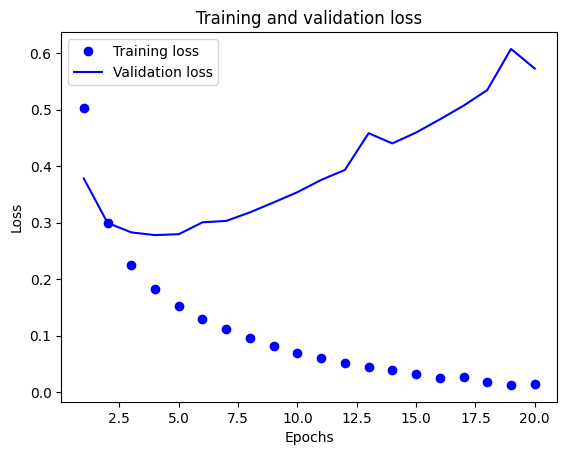

In [14]:
# 훈련과 검증 손실 그리기
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) +1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')    # bo는 파란색 점을 의미
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')    # b는 파란색 실선
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

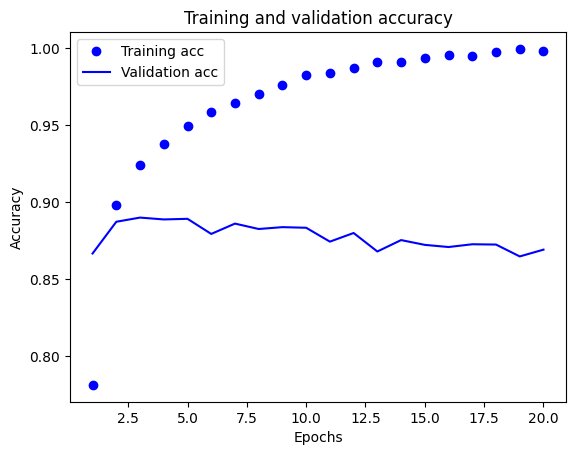

In [15]:
# 훈련과 검증 정확도 그리기
import matplotlib.pyplot as plt

plt.clf()
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [16]:
# 모델을 처음부터 다시 훈련하기
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(16, activation='relu'),    # 여기에서의 가중치는 (10000, 16)
    layers.Dense(16, activation='relu'),    # 여기에서의 가중치는 (16, 16)
    layers.Dense(1, activation='sigmoid'),    # 여기에서의 가중치는 (16, 1)
])

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)
results    # 첫 번째 숫자 0.29는 테스트 손실이고, 두 번째 숫자 0.88은 테스트 정확도임

Epoch 1/4
49/49 [==============================] - 3s 51ms/step - loss: 0.5203 - accuracy: 0.7726
Epoch 2/4
49/49 [==============================] - 2s 46ms/step - loss: 0.2989 - accuracy: 0.8995
Epoch 3/4
49/49 [==============================] - 2s 37ms/step - loss: 0.2238 - accuracy: 0.9220
Epoch 4/4
782/782 [==============================] - 2s 2ms/step - loss: 0.3217 - accuracy: 0.8710


[0.3217284381389618, 0.8710399866104126]

## 4.1.5 훈련된 모델로 새로운 데이터에 대해 예측하기

In [25]:
model.predict(x_test)

782/782 [==============================] - 2s 3ms/step


array([[0.02682924],
       [0.99998593],
       [0.05193911],
       ...,
       [0.03404501],
       [0.01444834],
       [0.88164866]], dtype=float32)

## 4.1.6 추가 실험

In [17]:
# 은닉층을 1로 해보기

from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(16, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 2s 63ms/step - loss: 0.5231 - accuracy: 0.7822 - val_loss: 0.4395 - val_accuracy: 0.8147
Epoch 2/20
30/30 [==============================] - 1s 40ms/step - loss: 0.3460 - accuracy: 0.8918 - val_loss: 0.3387 - val_accuracy: 0.8770
Epoch 3/20
30/30 [==============================] - 1s 41ms/step - loss: 0.2728 - accuracy: 0.9119 - val_loss: 0.3066 - val_accuracy: 0.8816
Epoch 4/20
30/30 [==============================] - 1s 37ms/step - loss: 0.2300 - accuracy: 0.9260 - val_loss: 0.2878 - val_accuracy: 0.8881
Epoch 5/20
30/30 [==============================] - 2s 59ms/step - loss: 0.2015 - accuracy: 0.9375 - val_loss: 0.2919 - val_accuracy: 0.8837
Epoch 6/20
30/30 [==============================] - 2s 66ms/step - loss: 0.1801 - accuracy: 0.9419 - val_loss: 0.2769 - val_accuracy: 0.8868
Epoch 7/20
30/30 [==============================] - 2s 73ms/step - loss: 0.1607 - accuracy: 0.9507 - val_loss: 0.2770 - val_accuracy: 0.8855
Epoch 8/20
30

In [18]:
# 모델을 처음부터 다시 훈련하기

model = keras.Sequential([
    layers.Dense(16, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=6, batch_size=512)
results = model.evaluate(x_test, y_test)
results

Epoch 1/6
49/49 [==============================] - 2s 29ms/step - loss: 0.4688 - accuracy: 0.8222
Epoch 2/6
49/49 [==============================] - 1s 29ms/step - loss: 0.3048 - accuracy: 0.8944
Epoch 3/6
49/49 [==============================] - 1s 29ms/step - loss: 0.2475 - accuracy: 0.9145
Epoch 4/6
49/49 [==============================] - 1s 29ms/step - loss: 0.2147 - accuracy: 0.9244
Epoch 5/6
49/49 [==============================] - 2s 37ms/step - loss: 0.1927 - accuracy: 0.9328
Epoch 6/6
782/782 [==============================] - 2s 2ms/step - loss: 0.2856 - accuracy: 0.8844


[0.28558704257011414, 0.884440004825592]

In [19]:
# 은닉층을 3으로 해보기

from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(16, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 3s 60ms/step - loss: 0.5643 - accuracy: 0.7381 - val_loss: 0.4428 - val_accuracy: 0.8642
Epoch 2/20
30/30 [==============================] - 1s 41ms/step - loss: 0.3437 - accuracy: 0.8907 - val_loss: 0.3095 - val_accuracy: 0.8870
Epoch 3/20
30/30 [==============================] - 1s 39ms/step - loss: 0.2375 - accuracy: 0.9187 - val_loss: 0.2805 - val_accuracy: 0.8905
Epoch 4/20
30/30 [==============================] - 1s 40ms/step - loss: 0.1879 - accuracy: 0.9371 - val_loss: 0.2908 - val_accuracy: 0.8836
Epoch 5/20
30/30 [==============================] - 2s 57ms/step - loss: 0.1513 - accuracy: 0.9500 - val_loss: 0.3372 - val_accuracy: 0.8691
Epoch 6/20
30/30 [==============================] - 2s 56ms/step - loss: 0.1248 - accuracy: 0.9593 - val_loss: 0.3088 - val_accuracy: 0.8814
Epoch 7/20
30/30 [==============================] - 2s 60ms/step - loss: 0.1024 - accuracy: 0.9681 - val_loss: 0.3895 - val_accuracy: 0.8679
Epoch 8/20
30

In [20]:
# 모델을 처음부터 다시 훈련하기
model = keras.Sequential([
    layers.Dense(16, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=3, batch_size=512)
results = model.evaluate(x_test, y_test)
results

Epoch 1/3
49/49 [==============================] - 3s 35ms/step - loss: 0.5219 - accuracy: 0.7590
Epoch 2/3
49/49 [==============================] - 2s 44ms/step - loss: 0.2848 - accuracy: 0.9018
Epoch 3/3
782/782 [==============================] - 4s 2ms/step - loss: 0.2806 - accuracy: 0.8882


[0.2806214690208435, 0.8882399797439575]

In [21]:
# 32 유닛으로 해보기

from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(32, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 5s 143ms/step - loss: 0.5163 - accuracy: 0.7634 - val_loss: 0.3649 - val_accuracy: 0.8704
Epoch 2/20
30/30 [==============================] - 2s 59ms/step - loss: 0.3021 - accuracy: 0.8921 - val_loss: 0.2901 - val_accuracy: 0.8883
Epoch 3/20
30/30 [==============================] - 2s 56ms/step - loss: 0.2199 - accuracy: 0.9241 - val_loss: 0.2773 - val_accuracy: 0.8878
Epoch 4/20
30/30 [==============================] - 1s 44ms/step - loss: 0.1822 - accuracy: 0.9347 - val_loss: 0.3033 - val_accuracy: 0.8802
Epoch 5/20
30/30 [==============================] - 1s 45ms/step - loss: 0.1482 - accuracy: 0.9476 - val_loss: 0.2849 - val_accuracy: 0.8864
Epoch 6/20
30/30 [==============================] - 2s 57ms/step - loss: 0.1335 - accuracy: 0.9523 - val_loss: 0.2973 - val_accuracy: 0.8851
Epoch 7/20
30/30 [==============================] - 2s 56ms/step - loss: 0.1046 - accuracy: 0.9674 - val_loss: 0.5217 - val_accuracy: 0.8249
Epoch 8/20
3

In [22]:
# 모델을 처음부터 다시 훈련하기
model = keras.Sequential([
    layers.Dense(32, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=3, batch_size=512)
results = model.evaluate(x_test, y_test)
results

Epoch 1/3
49/49 [==============================] - 3s 44ms/step - loss: 0.4466 - accuracy: 0.8037
Epoch 2/3
49/49 [==============================] - 2s 38ms/step - loss: 0.2582 - accuracy: 0.9030
Epoch 3/3
782/782 [==============================] - 5s 6ms/step - loss: 0.2841 - accuracy: 0.8855


[0.28408947587013245, 0.8855199813842773]

In [23]:
# 64 유닛으로 해보기

from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(64, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 4s 97ms/step - loss: 0.5302 - accuracy: 0.7388 - val_loss: 0.3753 - val_accuracy: 0.8510
Epoch 2/20
30/30 [==============================] - 3s 114ms/step - loss: 0.3033 - accuracy: 0.8857 - val_loss: 0.2877 - val_accuracy: 0.8865
Epoch 3/20
30/30 [==============================] - 3s 90ms/step - loss: 0.2334 - accuracy: 0.9123 - val_loss: 0.3283 - val_accuracy: 0.8650
Epoch 4/20
30/30 [==============================] - 2s 72ms/step - loss: 0.1836 - accuracy: 0.9304 - val_loss: 0.2810 - val_accuracy: 0.8865
Epoch 5/20
30/30 [==============================] - 2s 70ms/step - loss: 0.1568 - accuracy: 0.9420 - val_loss: 0.2865 - val_accuracy: 0.8846
Epoch 6/20
30/30 [==============================] - 2s 71ms/step - loss: 0.1293 - accuracy: 0.9539 - val_loss: 0.2986 - val_accuracy: 0.8858
Epoch 7/20
30/30 [==============================] - 2s 64ms/step - loss: 0.1008 - accuracy: 0.9675 - val_loss: 0.4399 - val_accuracy: 0.8472
Epoch 8/20
3

In [24]:
# 모델을 처음부터 다시 훈련하기
model = keras.Sequential([
    layers.Dense(64, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)
results

Epoch 1/4
49/49 [==============================] - 6s 111ms/step - loss: 0.4470 - accuracy: 0.7958
Epoch 2/4
49/49 [==============================] - 5s 108ms/step - loss: 0.2636 - accuracy: 0.8967
Epoch 3/4
49/49 [==============================] - 5s 105ms/step - loss: 0.2117 - accuracy: 0.9170
Epoch 4/4
782/782 [==============================] - 4s 4ms/step - loss: 0.3314 - accuracy: 0.8715


[0.33138328790664673, 0.8714799880981445]

In [6]:
# mse 손실 함수 사용해 보기 (mean_squared_error)

from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(16, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='rmsprop',
              loss='mean_squared_error',
              metrics=['accuracy'])

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 7s 49ms/step - loss: 0.1996 - accuracy: 0.7599 - val_loss: 0.1487 - val_accuracy: 0.8528
Epoch 2/20
30/30 [==============================] - 1s 17ms/step - loss: 0.1206 - accuracy: 0.8783 - val_loss: 0.1090 - val_accuracy: 0.8727
Epoch 3/20
30/30 [==============================] - 1s 17ms/step - loss: 0.0889 - accuracy: 0.9029 - val_loss: 0.0952 - val_accuracy: 0.8829
Epoch 4/20
30/30 [==============================] - 1s 17ms/step - loss: 0.0719 - accuracy: 0.9205 - val_loss: 0.0877 - val_accuracy: 0.8883
Epoch 5/20
30/30 [==============================] - 0s 16ms/step - loss: 0.0611 - accuracy: 0.9313 - val_loss: 0.0848 - val_accuracy: 0.8890
Epoch 6/20
30/30 [==============================] - 0s 17ms/step - loss: 0.0534 - accuracy: 0.9404 - val_loss: 0.0911 - val_accuracy: 0.8762
Epoch 7/20
30/30 [==============================] - 1s 18ms/step - loss: 0.0478 - accuracy: 0.9482 - val_loss: 0.0894 - val_accuracy: 0.8815
Epoch 8/20
30

In [7]:
# 모델을 처음부터 다시 훈련하기
model = keras.Sequential([
    layers.Dense(16, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='rmsprop',
              loss='mean_squared_error',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=5, batch_size=512)
results = model.evaluate(x_test, y_test)
results

Epoch 1/5
49/49 [==============================] - 2s 10ms/step - loss: 0.1762 - accuracy: 0.7803
Epoch 2/5
49/49 [==============================] - 0s 10ms/step - loss: 0.0992 - accuracy: 0.8926
Epoch 3/5
49/49 [==============================] - 0s 10ms/step - loss: 0.0745 - accuracy: 0.9121
Epoch 4/5
49/49 [==============================] - 0s 10ms/step - loss: 0.0626 - accuracy: 0.9261
Epoch 5/5
782/782 [==============================] - 2s 2ms/step - loss: 0.0850 - accuracy: 0.8863


[0.08500613272190094, 0.8862800002098083]

In [8]:
# tanh 활성화 함수(초창기 신경망에서 인기 있었던 함수) 사용해 보기

from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(16, activation='tanh'),
    layers.Dense(16, activation='tanh'),
    layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='rmsprop',
              loss='mean_squared_error',
              metrics=['accuracy'])

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 2s 47ms/step - loss: 0.1667 - accuracy: 0.7800 - val_loss: 0.1170 - val_accuracy: 0.8609
Epoch 2/20
30/30 [==============================] - 1s 17ms/step - loss: 0.0926 - accuracy: 0.8914 - val_loss: 0.1003 - val_accuracy: 0.8653
Epoch 3/20
30/30 [==============================] - 0s 16ms/step - loss: 0.0658 - accuracy: 0.9209 - val_loss: 0.0827 - val_accuracy: 0.8885
Epoch 4/20
30/30 [==============================] - 1s 18ms/step - loss: 0.0536 - accuracy: 0.9342 - val_loss: 0.0885 - val_accuracy: 0.8809
Epoch 5/20
30/30 [==============================] - 1s 18ms/step - loss: 0.0437 - accuracy: 0.9474 - val_loss: 0.1203 - val_accuracy: 0.8395
Epoch 6/20
30/30 [==============================] - 1s 17ms/step - loss: 0.0379 - accuracy: 0.9549 - val_loss: 0.0902 - val_accuracy: 0.8775
Epoch 7/20
30/30 [==============================] - 1s 22ms/step - loss: 0.0326 - accuracy: 0.9601 - val_loss: 0.0916 - val_accuracy: 0.8808
Epoch 8/20
30

In [9]:
# 모델을 처음부터 다시 훈련하기
model = keras.Sequential([
    layers.Dense(16, activation='tanh'),
    layers.Dense(16, activation='tanh'),
    layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='rmsprop',
              loss='mean_squared_error',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=3, batch_size=512)
results = model.evaluate(x_test, y_test)
results

Epoch 1/3
49/49 [==============================] - 1s 10ms/step - loss: 0.1415 - accuracy: 0.8207
Epoch 2/3
49/49 [==============================] - 0s 10ms/step - loss: 0.0773 - accuracy: 0.9029
Epoch 3/3
782/782 [==============================] - 2s 2ms/step - loss: 0.0854 - accuracy: 0.8846


[0.08540826290845871, 0.8845599889755249]

## 4.1.7 정리
- 원본 데이터를 신경망에 텐서로 주입하기 위해서는 꽤 많은 전처리가 필요함, 단어 시퀀스는 이진 벡터로 인코딩될 수 있지만 다른 인코딩 방식도 있음
- relu 활성화 함수와 함께 Dense 층을 쌓은 모델은 (감성 분류를 포함하여) 여러 종류의 문제에 적용할 수 있어 앞으로 자주 사용하게 될 것임
- (출력 클래스가 2인) 이진 분류 문제에서 모델은 하나의 유닛과 sigmoid 활성화 함수를 가진 Dense 층으로 끝나야 함, 이 모델의 출력은 확률을 나타내는 0과 1 사이의 스칼라 값임
- 이진 분류 문제에서 이런 스칼라 시그모이느 출력에 대해 사용할 손실 함수는 binary_crossentropy임
- rmsprop 옵티마이저는 문제에 상관없이 일반적으로 충분히 좋은 선택임
- 훈련 데이터에 대해 성능이 향상됨에 따라 신경망은 과대적합되기 시작하고 이전에 본 적 없는 데이터에서는 결과가 점점 나빠지게 됩니다. 항상 훈련 세트 이외의 데이터에서 성능을 모니터링 해야 함

# 4.2 뉴스 기사 분류: 다중 분류 문제
- 2개 이상의 클래스가 있는 경우
- 46개의 상호 배타적인 토픽으로 분류하는 신경망
- 정확히는 단일 레이블 다중 분류임 <-> 다중 레이블 다중 분류

## 4.2.1 로이터 데이터셋

In [15]:
from tensorflow.keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)
print(len(train_data))
len(test_data)

2110848/2110848 [==============================] - 0s 0us/step
8982


2246

In [ ]:
# 8982 행에 컬럼은 각각 다름
print(train_data[10])

[1, 245, 273, 207, 156, 53, 74, 160, 26, 14, 46, 296, 26, 39, 74, 2979, 3554, 14, 46, 4689, 4329, 86, 61, 3499, 4795, 14, 61, 451, 4329, 17, 12]


In [ ]:
# 리뷰를 다시 텍스트로 디코딩하기
word_index = reuters.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])
decode_review = " ".join(
    [reverse_word_index.get(i - 3, '?') for i in train_data[0]])    # 0,1,2는 패딩, 문서 시작, 사전에 없음을 위해 예약되어 있으므로 인덱스에서 3을 뺌

decode_review

550378/550378 [==============================] - 0s 1us/step


'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

In [ ]:
# 샘플에 연결된 레이블은 토픽의 인덱스로 0과 45 사이의 정수임
train_labels[10]

3

## 4.2.2 데이터 준비

In [22]:
# 데이터 인코딩하기
x_train = vectorize_sequences(train_data)    # 훈련 데이터 벡터 변환
x_test = vectorize_sequences(test_data)    # 테스트 데이터 벡터 변환

In [ ]:
# 레이블 인코딩 하기 - 원-핫 인코딩
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results

y_train = to_one_hot(train_labels)    # 훈련 레이블 벡터 변환
y_test = to_one_hot(test_labels)    # 테스트 레이블 벡터 변환

In [ ]:
y_train.shape

(8982, 46)

In [ ]:
print(y_test.shape)
y_test

(2246, 46)


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [23]:
# 레이블을 벡터로 바꿔주는 keras의 내장 함수
from keras.utils.np_utils import to_categorical

y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

## 4.2.3 모델 구성
- 이전에 사용했던 것처럼 Dense 층을 쌓으면 각 층은 이전 층의 출력에서 제공한 정보만 사용할 수 있음
- 한 층이 분류 문제에 필요한 일부 정보를 누락하면 그다음 층에서 이를 복원할 방법이 없음
- 각 층은 잠재적으로 정보의 병목(information bottleneck)이 될 수 있음
- 이전 예제에서 16차원을 가진 중간층을 사용했지만 16차원 공간은 46개의 클래스를 구분하기에 너무 제약이 많을 것 같음
- 이렇게 규모가 작은 층은 유용한 정보를 완전히 잃게 되는 정보의 병목 지점처럼 동작할 수 있음
- 이런 이유로 좀 더 규모가 큰 65개의 유닛을 사용해 보기

### softmax 활성화 함수
- 각 입력 샘플마다 46개의 출력 클래스에 대한 확률 분포를 출력함
즉, 46차원의 출력 벡터를 만들며 output[i]는 어떤 샘플이 클래스 i에 속할 확률임
- 46개의 값을 모두 더하면 1이 됨

In [24]:
# 모델 정의하기
model = keras.Sequential([
    layers.Dense(64, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(46, activation='softmax'),    # 다중 클래스 분류에 주로 사용 (각 클래스에 대한 확률 분포를 계산해 줌)
])

### categorical_crossentropy
- 이런 문제에 사용할 최선의 손실 함수는 categorical_carossentropy임
- 이 함수는 두 확률 분포 사이의 거리를 측정함
- 여기에서는 모델이 출력한 확률 분포와 진짜 레이블의 분포 사이의 거리임
- 두 분포 사이의 거리를 최소화함으로써 진짜 레이블에 가능한 가장 가까운 출력을 내도록 모델을 훈련하게 됨

In [25]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [26]:
# 검증 세트 준비하기
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = y_train[:1000]
partial_y_train = y_train[1000:]

In [27]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 2s 30ms/step - loss: 2.7301 - accuracy: 0.4986 - val_loss: 1.8448 - val_accuracy: 0.6200
Epoch 2/20
16/16 [==============================] - 0s 14ms/step - loss: 1.5613 - accuracy: 0.6818 - val_loss: 1.3613 - val_accuracy: 0.7040
Epoch 3/20
16/16 [==============================] - 0s 14ms/step - loss: 1.1924 - accuracy: 0.7482 - val_loss: 1.1836 - val_accuracy: 0.7460
Epoch 4/20
16/16 [==============================] - 0s 13ms/step - loss: 0.9724 - accuracy: 0.7899 - val_loss: 1.0781 - val_accuracy: 0.7610
Epoch 5/20
16/16 [==============================] - 0s 14ms/step - loss: 0.8084 - accuracy: 0.8215 - val_loss: 1.0134 - val_accuracy: 0.7800
Epoch 6/20
16/16 [==============================] - 0s 14ms/step - loss: 0.6743 - accuracy: 0.8527 - val_loss: 0.9558 - val_accuracy: 0.7980
Epoch 7/20
16/16 [==============================] - 0s 13ms/step - loss: 0.5606 - accuracy: 0.8824 - val_loss: 0.9096 - val_accuracy: 0.8010
Epoch 8/20
16

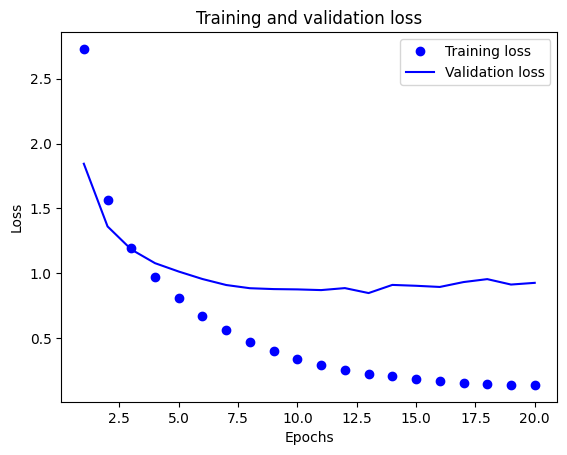

In [29]:
# 훈련과 검증 손실 그리기
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) +1)
plt.plot(epochs, loss, 'bo', label='Training loss')    # bo는 파란색 점을 의미
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

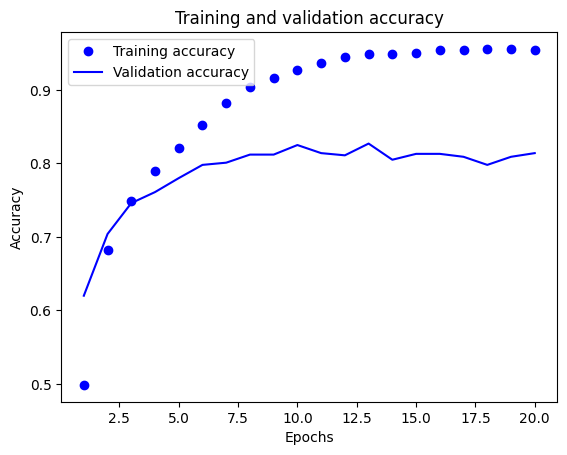

In [30]:
plt.clf()
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'bo', label='Training accuracy')    # bo는 파란색 점을 의미
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [31]:
model = keras.Sequential([
    layers.Dense(64, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(46, activation='softmax'),
])

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train,
                    y_train,
                    epochs=13,
                    batch_size=512)

results = model.evaluate(x_test, y_test)
results

Epoch 1/13
18/18 [==============================] - 1s 11ms/step - loss: 2.5903 - accuracy: 0.5039
Epoch 2/13
18/18 [==============================] - 0s 11ms/step - loss: 1.5014 - accuracy: 0.6638
Epoch 3/13
18/18 [==============================] - 0s 11ms/step - loss: 1.1622 - accuracy: 0.7491
Epoch 4/13
18/18 [==============================] - 0s 11ms/step - loss: 0.9465 - accuracy: 0.7990
Epoch 5/13
18/18 [==============================] - 0s 11ms/step - loss: 0.7804 - accuracy: 0.8354
Epoch 6/13
18/18 [==============================] - 0s 10ms/step - loss: 0.6424 - accuracy: 0.8647
Epoch 7/13
18/18 [==============================] - 0s 11ms/step - loss: 0.5345 - accuracy: 0.8873
Epoch 8/13
18/18 [==============================] - 0s 11ms/step - loss: 0.4491 - accuracy: 0.9049
Epoch 9/13
18/18 [==============================] - 0s 11ms/step - loss: 0.3813 - accuracy: 0.9174
Epoch 10/13
18/18 [==============================] - 0s 10ms/step - loss: 0.3254 - accuracy: 0.9284
Epoch 11/

[0.9940734505653381, 0.7885128855705261]

In [32]:
import copy
test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
hist_array = np.array(test_labels) == np.array(test_labels_copy)
hist_array.mean()

0.19056099732858414

## 4.2.5 새로운 데이터 대해 예측하기

In [36]:
predictions = model.predict(x_test)
print(predictions[0].shape)
predictions

71/71 [==============================] - 0s 2ms/step
(46,)


array([[2.0688003e-06, 2.0783289e-05, 2.1779930e-07, ..., 1.4262794e-06,
        3.3685319e-07, 4.4430459e-07],
       [3.5736463e-03, 4.1253626e-04, 1.5718135e-04, ..., 3.5331488e-04,
        6.3716155e-04, 3.4415221e-04],
       [2.3471967e-03, 9.5195246e-01, 6.5529731e-04, ..., 1.4674786e-04,
        1.2886229e-04, 3.5714151e-05],
       ...,
       [7.2532102e-06, 2.7721512e-04, 4.6975124e-06, ..., 2.6492646e-06,
        1.0446311e-06, 3.9332088e-05],
       [4.1424145e-04, 2.2791155e-02, 1.5758297e-03, ..., 1.2554494e-03,
        1.3786987e-04, 1.7347728e-04],
       [2.8009547e-04, 1.4244790e-01, 5.4874923e-03, ..., 3.9239187e-04,
        1.7763958e-04, 2.0785411e-04]], dtype=float32)

In [37]:
np.sum(predictions[0])

1.0

In [39]:
# 가장 큰 값이 예측 클래스가 됨, 즉 가장 확률이 높은 클래스임
np.argmax(predictions[0])

4

## 4.2.6 레이블과 손실을 다루는 다른 방법

In [ ]:
# 정수 텐서로 변환할 때는 손실 함수를 sparse_categorical_crossentropy로 바꾸어 주어야 함
# np.array함수는 np.asarray 함수와 동일하지만 입력된 넘파이 배열의 복사본을 만들어 반환함
y_train = np.array(train_data)
y_test = np.array(test_labels)

model.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

## 4.2.7 충분히 큰 중간층을 두어야 하는 이

In [ ]:
# 앞서 언급한 것처럼 마지막 추렬기 46차원이기 때문에 중간층의 중간 유닛이 46개보다 많이 적어서는 안 됨
# 46차원보다 훨씬 작은 중간층(예를 들어 4차원)을 두면 정보의 병목이 어떻게 나타나는지 확인해 보기로 함
# 검증 정확도의 값은 약 71%로 8% 정도 감소됨, 이런 손실의 원인 대부분은 많은 정보(클래스 46개의 분할 초평면을 복원하기에 충분한 정보)를
# 중간층의 저차원 표현 공간으로 압축하려고 했기 때문임, 이 모델의 필요한 정보 대부분을 4차원 표현 안에 구겨 넣었지만 전부는 넣지 못했음

model = keras.Sequential([
    layers.Dense(64, activation='relu'),
    layers.Dense(4, activation='relu'),
    layers.Dense(46, activation='softmax'),
])

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=128,
                    validation_data=(x_val, y_val))

Epoch 1/20
63/63 [==============================] - 2s 21ms/step - loss: 3.0735 - accuracy: 0.2740 - val_loss: 2.3860 - val_accuracy: 0.3790
Epoch 2/20
63/63 [==============================] - 1s 18ms/step - loss: 2.0829 - accuracy: 0.4128 - val_loss: 1.7835 - val_accuracy: 0.5960
Epoch 3/20
63/63 [==============================] - 2s 26ms/step - loss: 1.5350 - accuracy: 0.6363 - val_loss: 1.5150 - val_accuracy: 0.6340
Epoch 4/20
63/63 [==============================] - 2s 30ms/step - loss: 1.2784 - accuracy: 0.6902 - val_loss: 1.3707 - val_accuracy: 0.6700
Epoch 5/20
63/63 [==============================] - 2s 29ms/step - loss: 1.1266 - accuracy: 0.7238 - val_loss: 1.3222 - val_accuracy: 0.6860
Epoch 6/20
63/63 [==============================] - 1s 18ms/step - loss: 1.0204 - accuracy: 0.7429 - val_loss: 1.3051 - val_accuracy: 0.6960
Epoch 7/20
63/63 [==============================] - 1s 18ms/step - loss: 0.9391 - accuracy: 0.7585 - val_loss: 1.2872 - val_accuracy: 0.6970
Epoch 8/20
63

## 4.2.8 실험
- 더 크거나 작은 층 사용해 보기, 32개의 유닛, 128개의 유닛 등
- 최종 소프트맥스 분류 층 이전에 2개의 중간층을 사용했는데, 1개나 3개의 중간층 사용해 보기

In [40]:
# 32개의 유닛 사용해 보기

model = keras.Sequential([
    layers.Dense(32, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(46, activation='softmax'),
])

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=128,
                    validation_data=(x_val, y_val))

Epoch 1/20
63/63 [==============================] - 2s 11ms/step - loss: 2.1774 - accuracy: 0.5758 - val_loss: 1.4933 - val_accuracy: 0.6780
Epoch 2/20
63/63 [==============================] - 0s 6ms/step - loss: 1.2439 - accuracy: 0.7301 - val_loss: 1.2025 - val_accuracy: 0.7390
Epoch 3/20
63/63 [==============================] - 0s 6ms/step - loss: 0.9458 - accuracy: 0.7949 - val_loss: 1.0681 - val_accuracy: 0.7740
Epoch 4/20
63/63 [==============================] - 0s 6ms/step - loss: 0.7401 - accuracy: 0.8391 - val_loss: 0.9944 - val_accuracy: 0.7920
Epoch 5/20
63/63 [==============================] - 0s 5ms/step - loss: 0.5890 - accuracy: 0.8703 - val_loss: 0.9868 - val_accuracy: 0.7830
Epoch 6/20
63/63 [==============================] - 0s 5ms/step - loss: 0.4709 - accuracy: 0.8970 - val_loss: 0.9310 - val_accuracy: 0.8100
Epoch 7/20
63/63 [==============================] - 0s 5ms/step - loss: 0.3823 - accuracy: 0.9174 - val_loss: 0.9181 - val_accuracy: 0.8270
Epoch 8/20
63/63 [=

In [41]:
# 128개의 유닛 사용해 보기

model = keras.Sequential([
    layers.Dense(32, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(46, activation='softmax'),
])

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=128,
                    validation_data=(x_val, y_val))

Epoch 1/20
63/63 [==============================] - 1s 9ms/step - loss: 2.3507 - accuracy: 0.5276 - val_loss: 1.5490 - val_accuracy: 0.6400
Epoch 2/20
63/63 [==============================] - 0s 6ms/step - loss: 1.2845 - accuracy: 0.7037 - val_loss: 1.1973 - val_accuracy: 0.7300
Epoch 3/20
63/63 [==============================] - 0s 6ms/step - loss: 0.9681 - accuracy: 0.7761 - val_loss: 1.0423 - val_accuracy: 0.7680
Epoch 4/20
63/63 [==============================] - 0s 5ms/step - loss: 0.7519 - accuracy: 0.8341 - val_loss: 0.9522 - val_accuracy: 0.7950
Epoch 5/20
63/63 [==============================] - 0s 5ms/step - loss: 0.5868 - accuracy: 0.8703 - val_loss: 0.9059 - val_accuracy: 0.8060
Epoch 6/20
63/63 [==============================] - 0s 5ms/step - loss: 0.4595 - accuracy: 0.9007 - val_loss: 0.8911 - val_accuracy: 0.8060
Epoch 7/20
63/63 [==============================] - 0s 6ms/step - loss: 0.3691 - accuracy: 0.9206 - val_loss: 0.8676 - val_accuracy: 0.8140
Epoch 8/20
63/63 [==

In [42]:
# 1개의 중간층 사용해 보기

model = keras.Sequential([
    layers.Dense(64, activation='relu'),
    layers.Dense(46, activation='softmax'),
])

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=128,
                    validation_data=(x_val, y_val))

Epoch 1/20
63/63 [==============================] - 1s 8ms/step - loss: 1.8319 - accuracy: 0.6263 - val_loss: 1.2409 - val_accuracy: 0.7300
Epoch 2/20
63/63 [==============================] - 0s 6ms/step - loss: 0.9807 - accuracy: 0.7930 - val_loss: 1.0083 - val_accuracy: 0.7840
Epoch 3/20
63/63 [==============================] - 1s 8ms/step - loss: 0.6840 - accuracy: 0.8614 - val_loss: 0.8746 - val_accuracy: 0.8150
Epoch 4/20
63/63 [==============================] - 0s 7ms/step - loss: 0.4971 - accuracy: 0.8986 - val_loss: 0.8189 - val_accuracy: 0.8250
Epoch 5/20
63/63 [==============================] - 0s 7ms/step - loss: 0.3735 - accuracy: 0.9216 - val_loss: 0.8063 - val_accuracy: 0.8270
Epoch 6/20
63/63 [==============================] - 0s 5ms/step - loss: 0.2936 - accuracy: 0.9367 - val_loss: 0.8003 - val_accuracy: 0.8230
Epoch 7/20
63/63 [==============================] - 0s 5ms/step - loss: 0.2400 - accuracy: 0.9432 - val_loss: 0.8035 - val_accuracy: 0.8300
Epoch 8/20
63/63 [==

In [43]:
# 3개의 중간층 사용해 보기

model = keras.Sequential([
    layers.Dense(64, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(46, activation='softmax'),
])

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=128,
                    validation_data=(x_val, y_val))

Epoch 1/20
63/63 [==============================] - 2s 9ms/step - loss: 1.7783 - accuracy: 0.6179 - val_loss: 1.2409 - val_accuracy: 0.7030
Epoch 2/20
63/63 [==============================] - 0s 6ms/step - loss: 1.0112 - accuracy: 0.7635 - val_loss: 1.0920 - val_accuracy: 0.7600
Epoch 3/20
63/63 [==============================] - 0s 5ms/step - loss: 0.7041 - accuracy: 0.8373 - val_loss: 0.9637 - val_accuracy: 0.7880
Epoch 4/20
63/63 [==============================] - 0s 5ms/step - loss: 0.4976 - accuracy: 0.8909 - val_loss: 0.9462 - val_accuracy: 0.8000
Epoch 5/20
63/63 [==============================] - 0s 5ms/step - loss: 0.3585 - accuracy: 0.9237 - val_loss: 0.9030 - val_accuracy: 0.8130
Epoch 6/20
63/63 [==============================] - 0s 5ms/step - loss: 0.2846 - accuracy: 0.9372 - val_loss: 0.8907 - val_accuracy: 0.8280
Epoch 7/20
63/63 [==============================] - 0s 5ms/step - loss: 0.2267 - accuracy: 0.9463 - val_loss: 0.9957 - val_accuracy: 0.7990
Epoch 8/20
63/63 [==

In [44]:
# 1개의 중간층 사용해 보기

model = keras.Sequential([
    layers.Dense(64, activation='relu'),
    layers.Dense(46, activation='softmax'),
])

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=128,
                    validation_data=(x_val, y_val))

Epoch 1/20
63/63 [==============================] - 1s 8ms/step - loss: 1.9048 - accuracy: 0.6309 - val_loss: 1.2396 - val_accuracy: 0.7440
Epoch 2/20
63/63 [==============================] - 0s 5ms/step - loss: 0.9676 - accuracy: 0.7977 - val_loss: 0.9909 - val_accuracy: 0.7920
Epoch 3/20
63/63 [==============================] - 0s 5ms/step - loss: 0.6663 - accuracy: 0.8628 - val_loss: 0.8812 - val_accuracy: 0.8200
Epoch 4/20
63/63 [==============================] - 0s 5ms/step - loss: 0.4842 - accuracy: 0.9003 - val_loss: 0.8137 - val_accuracy: 0.8250
Epoch 5/20
63/63 [==============================] - 0s 5ms/step - loss: 0.3675 - accuracy: 0.9228 - val_loss: 0.8038 - val_accuracy: 0.8260
Epoch 6/20
63/63 [==============================] - 0s 5ms/step - loss: 0.2909 - accuracy: 0.9374 - val_loss: 0.7856 - val_accuracy: 0.8320
Epoch 7/20
63/63 [==============================] - 0s 5ms/step - loss: 0.2377 - accuracy: 0.9444 - val_loss: 0.7862 - val_accuracy: 0.8310
Epoch 8/20
63/63 [==

## 4.2.9 정리
- N개의 클래스로 데이터 포인트를 분류하려면 모델의 마지막 층의 크기는 N이어야 함
- 단일 레이블, 다중 분류 문제에서는 N개의 클래스에 대한 확률 분포를 출력하기 위해 softmax 활성화 함수를 사용해야 함
- 이런 문제에는 항상 범주형 크로스엔트로피를 사용해야 함, 이 함수는 모델이 출력한 확률 분포와 타깃 분포 사이의 거리를 최소화함
- 다중 분류에서 레이블을 다루는 두 가지 방법이 있음
    1. 레이블을 범주형 인코딩(또는 원-핫 인코딩)으로 인코딩하고 categorical_crossentropy 손실 함수를 사용함
    2. 레이블을 정수로 인코딩하고 sparse_categorical_crossentropy 손실 함수를 사용함
- 많은 수의 범주를 분류할 때 중간층의 크기가 너무 작아 모델에 정보의 병목이 생기지 않도록 해야 함

# 4.3 주택 가격 예측: 회귀 문제
- 개별적인 레이블 대신 연속적인 값을 예측하는 회귀 문제임

## 4.3.1 보스턴 주택 가격 데이터셋
- 각 특성의 스케일이 서로 다름 주의
- 타깃은 주택의 중간 가격으로 천 달러 단위임 (1만 달러 ~ 5만 달러 사이)

In [45]:
from tensorflow.keras.datasets import boston_housing
(train_data, train_targets), (test_data, test_targets) = (boston_housing.load_data())

57026/57026 [==============================] - 0s 0us/step


In [46]:
print(train_data.shape)
test_data.shape

(404, 13)


(102, 13)

## 4.3.2 데이터 준비
- 특성별로 정규화해주기
- (각 특성 - 각 특성의 평균) / 표준편차
- 특성의 중앙이 0 근처에 맞추어지고 표준 편차가 1이 됨
- 특성의 스케일이 다르면 전역 최소 점을 찾아가는 경사 하강법의 경로가 스케일이 큰 특성에 영향을 많이 받음

In [50]:
# 데이터 정규화하기
# 테스트 데이터를 정규화 할 때 사용한 값이 훈편 데이터에서 계산한 값임을 주목해야 함
# 머신 러닝 작업 과정에서 절대로 테스트 데이터에서 계산한 어떤 값도 사용해서는 안 됨
# 쉽게 생각해서 훈련 데이터와 테스트 데이터를 각각 다른 스케일로 변환하게 되면 훈련 데이터에서 학습한 정보가 쓸모없게 되는 셈임
# 마찬가지로 실전에 투입하여 새로운 데이터에 대한 예측을 만들 때도 훈련 데이터에서 계산한 값을 사용하여 정규화해야 함

mean = train_data.mean(axis=0)    # 각 열의 평균값을 계산함, 이것 안하면 전체 배열의 평균과 표준편차 구함
train_data -= mean
std = train_data.std(axis=0)
train_data /= std
test_data -= mean
test_data /= std

In [52]:
# 정규화 자동으로 해주는 함수 있는 것 같은데...
# import tensorflow as tf

# train_data = tf.keras.utils.normalize(train_data, axis=1)
# test_data = tf.keras.utils.normalize(test_data, axis=1)

2.602301889250862e-15

## 4.3.3 모델 구성
- 샘플 개수가 적기 때문에 64개의 유닛을 가진 2개의 중간층으로 작은 모델을 구성하여 사용하보기
- 일반적으로 훈련 데이터의 개수가 적을수록 과대적합이 더 쉽게 일어나므로 작은 모델을 사용하는 것이 과대적합을 피하는 한 방법임

In [55]:
# 모델 정의하기
# 이것이 정형적인 스칼라 회귀(하나의 연속적인 값을 예측하는 회귀)를 위한 구성임 (선형층 등)
# mse - 평균 제곱 오차, 회귀 문제에서 널리 사용되는 손실 함수임

def build_model():
    model = keras.Sequential([    # 동일한 모델을 여러 번 생성할 것이므로 함수를 만들어 사용함
        layers.Dense(64, activation='relu'),
        layers.Dense(64, activation='relu'),
        layers.Dense(1)    # 활성화 함수가 없음, 선형층이라 함 (활성화 함수를 적용하면 출력 값의 범위를 제한하게 됨 -> 제한없이 자유롭게 학습해야 함)
    ])
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model

## 4.3.4 K-겹 검증을 사용한 훈련 검증
- 데이터 포인트가 많지 않기 때문에 검증 세트와 훈련 세트로 어떤 데이터 포인트가 선택되었는지에 따라 검증 점수가 크게 달라짐
- 즉, 검증 세트의 분할에 대한 검증 점수의 분산이 높음, 이렇게 되면 모델을 신뢰 있게 평가할 수 없음

In [57]:
# K-겹 검증하기
k = 4
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = []
for i in range(k):
    print(f'#{i}번째 폴드 처리중')
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]    # 검증 데이터 준비: k번째 분할
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate(    # 훈련 데이터 준비: 다른 분할 전체
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]], axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]], axis=0)

    model = build_model()    # 케라스 모델 구성(컴파일 포함)
    model.fit(partial_train_data, partial_train_targets,    # 모델 훈련(vervose=0이므로 훈련 과정이 출력되지 않음)
              epochs=num_epochs, batch_size=16, verbose=0)
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)    # 검증 세트로 모델 평가
    all_scores.append(val_mae)

#0번째 폴드 처리중
#1번째 폴드 처리중
#2번째 폴드 처리중
#3번째 폴드 처리중


In [58]:
all_scores

[2.1075215339660645, 2.3636884689331055, 2.424680709838867, 2.5045089721679688]

In [59]:
np.mean(all_scores)

2.3500999212265015

In [63]:
# 각 폴드의 검증 점수 저장하기
# num_epochs = 500으로

k = 4
num_val_samples = len(train_data) // k
num_epochs = 500
all_mae_histories = []
for i in range(k):
    print(f'#{i}번째 폴드 처리중')
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]], axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]], axis=0)

    model = build_model()
    history = model.fit(partial_train_data, partial_train_targets,
                        validation_data=(val_data, val_targets),
                        epochs=num_epochs, batch_size=16, verbose=0)
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    mae_history = history.history['val_mae']
    all_mae_histories.append(mae_history)

#0번째 폴드 처리중
#1번째 폴드 처리중
#2번째 폴드 처리중
#3번째 폴드 처리중


In [68]:
# K-겹 검증 점수 평균 기록하기
average_mae_history = [np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

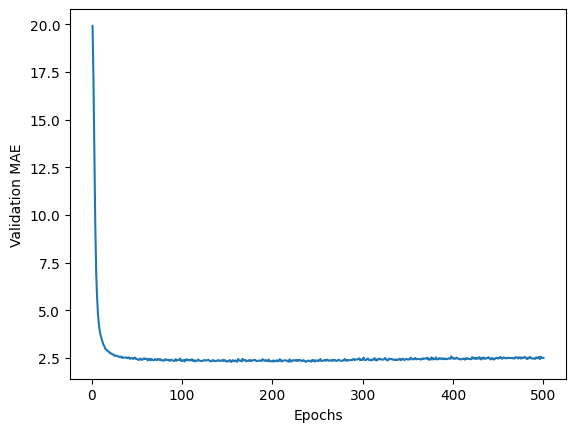

In [69]:
# 검증 점수 그래프 그리기
plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

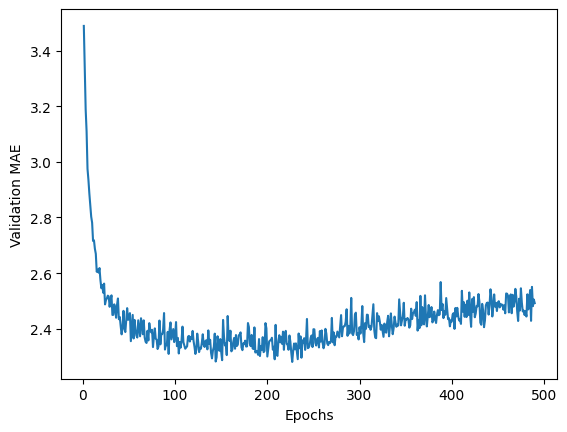

In [71]:
# 처음 10개의 데이터 포인트를 제외한 검증 점수 그래프 그리기 (위의 그래프는 범위가 커서 보기가 어려움)
truncated_mae_history = average_mae_history[10:]
plt.plot(range(1, len(truncated_mae_history) + 1), truncated_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

In [73]:
# 최종 모델 훈련하기
# 모델의 여러 매개 변수에 대한 튜닝이 끝나면 (에포크의 수뿐만 아니라 중간층의 크기도 조절할 수 있습니다) 모든 훈련 데이터를 사용하고
# 최상의 매개변수로 최종 실전에 투입될 모델을 훈련시킴
# 그다음 테스트 데이터로 성능을 확인함

model = build_model()    # 새롭게 컴파일된 모델을 얻음
model.fit(train_data, train_targets,    # 전체 데이터로 훈련시킴
          epochs=130, batch_size=16, verbose=0)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)
test_mae_score
# 아직 2,500달러 정도 차이가 남, 하지만 성능이 향상되었음, 이전 두 예제처럼 모델의 층수나 층의 유닛 개수를 바꾸어 테스트 오차를 더 낮출 수 있는지
# 확인해 볼 수 있음

4/4 [==============================] - 0s 3ms/step - loss: 17.1359 - mae: 2.7201


2.7200584411621094

In [74]:
## 4.3.5 새로운 데이터에 대해 예측하기
# 새로운 샘플의 가격을 1,000달러 단위로 예측할 수 있음

predictions = model.predict(test_data)
predictions[0]

4/4 [==============================] - 0s 2ms/step


array([8.253452], dtype=float32)

## 4.3.6 정리
- 회귀는 분류에서 사용했던 것과는 다른 손실 함수를 사용함, 평균 제곱 오차(MSE)는 회귀에서 자주 사용되는 손실 함수임
- 비슷하게 회귀에서 사용되는 평가 지표는 분류와 다름, 당연히 정확도 개념은 회귀에 적용되지 않음, 일반적인 회귀 지표는 평균 절대 오차(MAE)임
- 입력 데이터 특성이 서로 다른 범위를 가지면 전처리 단계에서 각 특성을 개별적으로 스케일 조정해야 함
- 가용한 데이터가 적다면 K-겹 검증을 사용하는 것이 신뢰할 수 있는 모델 평가 방법임
- 가용한 훈련 데이터가 적다면 과대적합을 피하기 위해 중간층의 수를 줄인 작은 모델을 사용하는 것이 좋음(일반적으로는 1개 또는 2개)

# 4.4 요약
- 벡터 데이터를 사용하는 가장 일반적인 머신 러닝 작업은 이진 분류, 다중 분류, 스칼라 회귀임
    - 이 장의 '정리'절에서 이런 종류의 작업을 통해 배울 중요한 사항들을 정리해 놓았음
    - 회귀에서 사용하는 손실 함수와 평가 지표는 분류와 다름
- 보통 원본 데이터를 신경망에 주입하기 전에 전처리해야 함
- 데이터에 범위가 다른 특성이 있다면 전처리 단계에서 각 특성을 독립적으로 스케일 조정해야 함
- 훈련이 진행됨에 따라 신경망의 과대적합이 시작되고 새로운 데이터에 대해 나쁜 결과를 얻게 됨
- 훈련 데이터가 많지 않으면 과대적합을 피하기 위해 1개 또는 2개의 중간층을 가진 모델을 사용함
- 데이터가 많은 범주로 나위어 있을 때 중간층이 너무 작으면 정보의 병목이 생길 수 있음
- 데이터양이 적을 때는 K-겹 검증이 신뢰할 수 있는 모델 평가를 도와줌